## Quiz 1

In [4]:
# quiz 1
from scipy import optimize
import numpy as np

def f(x):
  return np.exp((x-0.7)**2)

print(optimize.minimize_scalar(f))

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 1.0
       x: 0.6999999896325766
     nit: 9
    nfev: 12


## Quiz 2

10
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


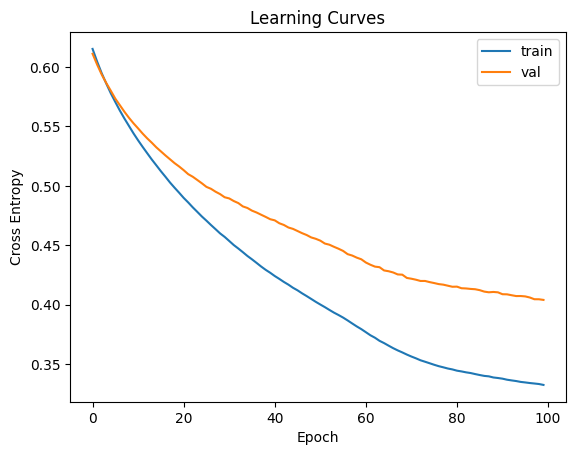

In [1]:
# quiz 2
# example of plotting learning curves
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from matplotlib import pyplot
from tensorflow.keras.utils import plot_model

# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=10, random_state=1)
# determine the number of input features
n_features = X.shape[1]
print(n_features)
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
model.summary()
# fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Quiz 3

In [3]:
# quiz 3
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

data = pd.read_csv('drive/MyDrive/Colab_Notebooks_2/data/housing.csv', header=None)
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

model = Ridge()
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

mae = np.mean(np.abs(test_y - pred_y))

print(f'MAE: {mae}')

MAE: 3.178539076034557


## Quiz 4

In [32]:
# quiz 4
import struct
import numpy as np

import sys
import gzip
import shutil
import os

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte'
                                % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte'
                               % kind)

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape(len(labels), 784)

    return images, labels


X_data, y_data = load_mnist('/content/drive/MyDrive/Colab_Notebooks_2/data', kind='train')
print('Rows: %d,  Columns: %d' % (X_data.shape[0], X_data.shape[1]))
X_test, y_test = load_mnist('/content/drive/MyDrive/Colab_Notebooks_2/data', kind='t10k')
print('Rows: %d,  Columns: %d' % (X_test.shape[0], X_test.shape[1]))

X_train, y_train = X_data[:50000,:], y_data[:50000]
X_valid, y_valid = X_data[50000:,:], y_data[50000:]

print('Training:   ', X_train.shape, y_train.shape)
print('Validation: ', X_valid.shape, y_valid.shape)
print('Test Set:   ', X_test.shape, y_test.shape)

Rows: 60000,  Columns: 784
Rows: 10000,  Columns: 784
Training:    (50000, 784) (50000,)
Validation:  (10000, 784) (10000,)
Test Set:    (10000, 784) (10000,)


In [33]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder(sparse_output=False)
y_train = ohc.fit_transform(y_train.reshape(-1, 1))
y_valid = ohc.transform(y_valid.reshape(-1, 1))
y_test = ohc.transform(y_test.reshape(-1, 1))

In [34]:
n_features = X_train.shape[1]
print(n_features)
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))
# compile the model
sgd = Adam()
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


784
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                7850      
                                                                 
 dense_20 (Dense)            (None, 5)                 55        
                                                                 
 dense_21 (Dense)            (None, 10)                60        
                                                                 
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9701 - accuracy: 0.2215 - val_loss: 1.9648 - val_accuracy: 0.2301
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8904 - accuracy: 0.2561 - val_loss: 1.8024 - val_accuracy: 0.2771
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7041 - accuracy: 0.2895 - val_loss: 1.6607 - val_accuracy: 0.3020
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6084 - accuracy: 0.3153 - val_loss: 1.5943 - val_accuracy: 0.3438
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5482 - accuracy: 0.3384 - val_loss: 1.5489 - val_accuracy: 0.3389


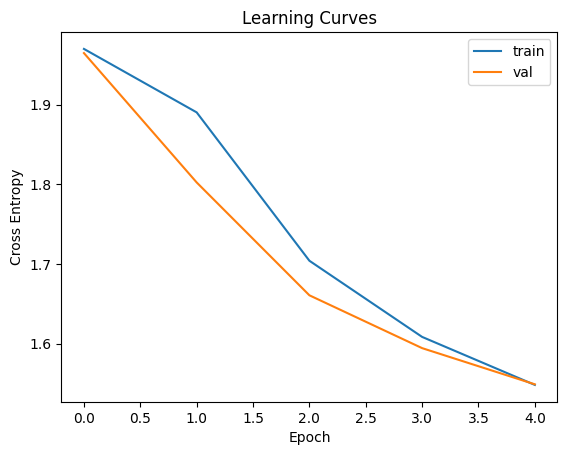

In [36]:
# fit the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1, validation_data=(X_valid, y_valid))
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [37]:
# Standardize data based on training data

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_centered = ss.fit_transform(X_train)
X_valid_centered = ss.transform(X_valid)
X_test_centered = ss.transform(X_test)

del X_data, y_data, X_train, X_valid, X_test

784
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                7850      
                                                                 
 dense_23 (Dense)            (None, 5)                 55        
                                                                 
 dense_24 (Dense)            (None, 10)                60        
                                                                 
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6825 - accuracy: 0.7831 - val_loss: 0.3441 - val_accuracy: 0.9045
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3323 - accuracy: 0.9062 - val_loss: 0.3168 - val_accuracy: 0.9186
Epoch 3/5
1563/1563 [=====

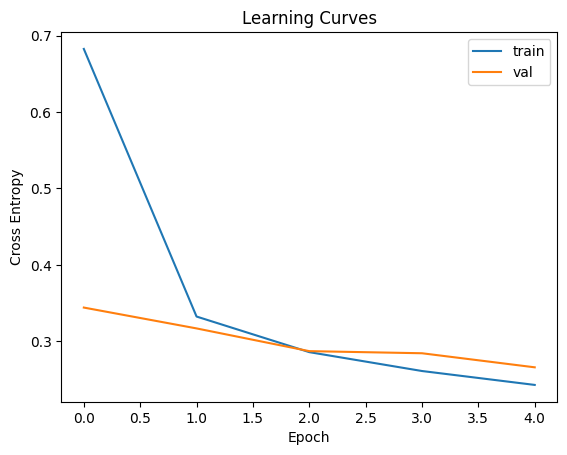

In [38]:
n_features = X_train_centered.shape[1]
print(n_features)
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))
# compile the model
sgd = Adam()
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# fit the model
history = model.fit(X_train_centered, y_train, epochs=5, batch_size=32, verbose=1, validation_data=(X_valid_centered, y_valid))
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()